# Breast Cancer Classification with the Perceptron Neural Network

##### In this project, we will make a linear classification of the breast cancer data set using the Perceptron neural network.

Links to the neural model and data set:
- Perceptron Model: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html
- Breast Cancer Wisconsin (Diagnostic) Data Set: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Importing Libraries

In [43]:
from sklearn import preprocessing # library for preprocessing support
from sklearn.model_selection import train_test_split # library for splitting samples into training and testing sets
from sklearn.linear_model import Perceptron # library with functions for executing the Perceptron neural network
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import metrics # library for obtaining metrics for model evaluation
import matplotlib.pyplot as plt # library for plotting graphs
import numpy as np
import pandas as pd

### Loading the Data Set

In [44]:
# Path of the dataset that will be loaded into a dataframe
df = pd.read_csv("BreastCancerWisconsinDataSet.csv")

### Exploring the Data Set

In [45]:
# Checking the header of the dataframe
print(df.head())

# Data Wrangler is especially useful in this step

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

### Data Preprocessing

In [46]:
# Checking the info
print(df.info())

# As the first column is only made of id numbers and the last column is null, they're removed from the dataframe
df.drop(columns=[df.columns[0], df.columns[-1]], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Dealing with Outliers

In [47]:
# Check the minimum and maximum values for each column in the dataset to see if there are any extreme outliers
# If there are not, we can use the MinMaxScaler
# For this, we'll make a function
def check_outliers(df=df):
    # Start a counter
    i = 0
    # Loop through each column
    for column in df.columns:
        # Sort the dataframe by the current column
        sorted_df = df.sort_values(by=column)
        # Check if the values are integers or floats
        if isinstance(sorted_df[column].iloc[0], int) or isinstance(sorted_df[column].iloc[0], float):
            # Avoid division by zero
            if sorted_df[column].iloc[0] == 0:
                print('\n *** Possible outlier(s)! Check with attention: ***')
            # Alert if the maximum value is over 50 times bigger than the minimum
            # elif (sorted_df[column].iloc[-1]/sorted_df[column].iloc[0]) > 50:
            #     print('\n *** Possible outlier(s)! Check with attention: ***')
        # Get the ten minimum values
        print(f'{column} min:', sorted_df[column].head(10).values)
        # Get the ten maximum values
        print(f'{column} max:', sorted_df[column].tail(10).values)
        print()
        # Increment the counter
        i += 1
    
    return

check_outliers()

diagnosis min: ['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B']
diagnosis max: ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']

radius_mean min: [6.981 7.691 7.729 7.76  8.196 8.219 8.571 8.597 8.598 8.618]
radius_mean max: [23.27 23.29 23.51 24.25 24.63 25.22 25.73 27.22 27.42 28.11]

texture_mean min: [ 9.71 10.38 10.72 10.82 10.89 10.91 10.94 11.28 11.79 11.89]
texture_mean max: [29.43 29.81 29.97 30.62 30.72 31.12 32.47 33.56 33.81 39.28]

perimeter_mean min: [43.79 47.92 47.98 48.34 51.71 53.27 54.09 54.34 54.42 54.53]
perimeter_mean max: [153.5 155.1 158.9 165.5 166.2 171.5 174.2 182.1 186.9 188.5]

area_mean min: [143.5 170.4 178.8 181.  201.9 203.9 221.2 221.3 221.8 224.5]
area_mean max: [1685. 1686. 1747. 1761. 1841. 1878. 2010. 2250. 2499. 2501.]

smoothness_mean min: [0.05263 0.06251 0.06429 0.06576 0.06613 0.06828 0.06883 0.06935 0.0695
 0.06955]
smoothness_mean max: [0.1286 0.1291 0.1323 0.1326 0.1335 0.1371 0.1398 0.1425 0.1447 0.1634]

compactness_mean min: [0.01938 0.02344 0.0265  0

In [48]:
# As there are some columns with many zeroes, we'll filter those and make a new dataframe
# Copy the dataframe
df_no2 = df.copy()

# deleting all the rows with zeroes
df_no2 = df_no2[~(df_no2 == 0).any(axis=1)]

# Checking the info of the new dataframe
print(df_no2.info())

# We can see that 13 rows from the original 569 were removed
# 13/569 = 0.022847
# Approximately 2.3% of the women in the dataset show no concavities in their breasts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                556 non-null    object 
 1   radius_mean              556 non-null    float64
 2   texture_mean             556 non-null    float64
 3   perimeter_mean           556 non-null    float64
 4   area_mean                556 non-null    float64
 5   smoothness_mean          556 non-null    float64
 6   compactness_mean         556 non-null    float64
 7   concavity_mean           556 non-null    float64
 8   concave points_mean      556 non-null    float64
 9   symmetry_mean            556 non-null    float64
 10  fractal_dimension_mean   556 non-null    float64
 11  radius_se                556 non-null    float64
 12  texture_se               556 non-null    float64
 13  perimeter_se             556 non-null    float64
 14  area_se                  5

### Separating the Input Data for the Neural Network

In [49]:
# We'll test if the neural network has better results with the original dataframe or the new dataframe
# Separating the target column from the dataset
y_original = df.iloc[:, 0].values
y_filtered = df_no2.iloc[:, 0].values

# Encoding the target column using the label encoder - Transforms the classes into 0 and 1 - Diagnosis (M = malignant = 1, B = benign = 0)
y_original = np.where(y_original == 'M', 1, 0)
y_filtered = np.where(y_filtered == 'M', 1, 0)

# Separating the columns with variables to determine the inputs of the neural network
x_original = df.iloc[:, 1:].values
x_filtered = df_no2.iloc[:, 1:].values

# Check if everything was selected correctly
print(x_original.shape)
print(y_original.shape)
print(x_filtered.shape)
print(y_filtered.shape)

(569, 30)
(569,)
(556, 30)
(556,)


### Feature Standardization

In [50]:
# As seen previously, except for cases with zeroes, there were no isolated extreme outliers in the maximum and minimum values of each column - so we can use the MinMaxScaler
# Normalization of data using sklearn - scaling data between 0 and 1
scaler = preprocessing.MinMaxScaler()
x_original = scaler.fit_transform(x_original)
x_filtered = scaler.fit_transform(x_filtered)

### Visualizing the Data

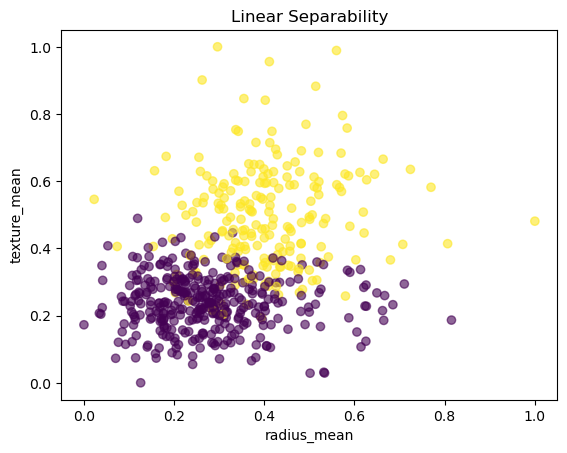

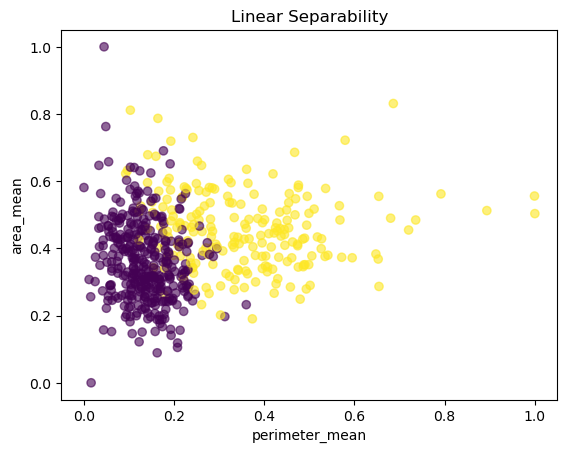

<Figure size 640x480 with 0 Axes>

In [51]:
# Plotting some graphs to check if the samples are linearly separable
# If the two classes (Malignant and Benign) are linearly separable, we can use the Perceptron neural network
plt.scatter(x_original[:,1], x_original[:,2], c=y_original, alpha=0.6)
plt.title('Linear Separability')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()
plt.clf()

plt.scatter(x_original[:,3], x_original[:,4], c=y_original, alpha=0.6)
plt.title('Linear Separability')
plt.xlabel('perimeter_mean')
plt.ylabel('area_mean')
plt.show()
plt.clf()

### Separating the Data for Training and Testing

In [52]:
# Splitting the dataset into training and testing samples: 70% of the values for training and 30% for testing
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(x_original, y_original, test_size=0.30, random_state=12)
x_train_filtered, x_test_filtered, y_train_filtered, y_test_filtered = train_test_split(x_filtered, y_filtered, test_size=0.30, random_state=12)

### Building and Testing the Models

In [53]:
# Making two Perceptron models: 'p1' and 'p2'
p1 = Perceptron()
p1.fit(x_train_original, y_train_original)

p2 = Perceptron()
p2.fit(x_train_filtered, y_train_filtered)

Perceptron()

### Presentation of Metrics

In [54]:
# Model 1 ('p1'):
predictions_train_1 = p1.predict(x_train_original) # Validation of the trained sample set
train_score_1 = accuracy_score(predictions_train_1, y_train_original) # Accuracy evaluation of the classification of samples presented during training
print("Accuracy with training data: ", train_score_1)

predictions_test_1 = p1.predict(x_test_original) # Validation of the sample set that was not used in training
test_score_1 = accuracy_score(predictions_test_1, y_test_original) # Accuracy evaluation of the classification of samples that were not used in training
print("Accuracy with test data: ", test_score_1)

print(classification_report(predictions_test_1, y_test_original))

print("Number of epochs in training: ", p1.n_iter_)
print("List of parameters configured in Perceptron: ", p1.get_params())

Accuracy with training data:  0.9874371859296482
Accuracy with test data:  0.9707602339181286
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       112
           1       0.92      1.00      0.96        59

    accuracy                           0.97       171
   macro avg       0.96      0.98      0.97       171
weighted avg       0.97      0.97      0.97       171

Number of epochs in training:  12
List of parameters configured in Perceptron:  {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [55]:
# Model 2 ('p2'):
predictions_train_2 = p2.predict(x_train_filtered) # Validation of the trained sample set
train_score_2 = accuracy_score(predictions_train_2, y_train_filtered) # Accuracy evaluation of the classification of samples presented during training
print("Accuracy with training data: ", train_score_2)

predictions_test_2 = p2.predict(x_test_filtered) # Validation of the sample set that was not used in training
test_score = accuracy_score(predictions_test_2, y_test_filtered) # Accuracy evaluation of the classification of samples that were not used in training
print("Accuracy with test data: ", test_score)

print(classification_report(predictions_test_2, y_test_filtered))

print("Number of epochs in training: ", p2.n_iter_)
print("List of parameters configured in Perceptron: ", p2.get_params())

Accuracy with training data:  0.974293059125964
Accuracy with test data:  0.9820359281437125
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       101
           1       0.96      1.00      0.98        66

    accuracy                           0.98       167
   macro avg       0.98      0.99      0.98       167
weighted avg       0.98      0.98      0.98       167

Number of epochs in training:  9
List of parameters configured in Perceptron:  {'alpha': 0.0001, 'class_weight': None, 'early_stopping': False, 'eta0': 1.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': None, 'random_state': 0, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


### Confusion Matrix

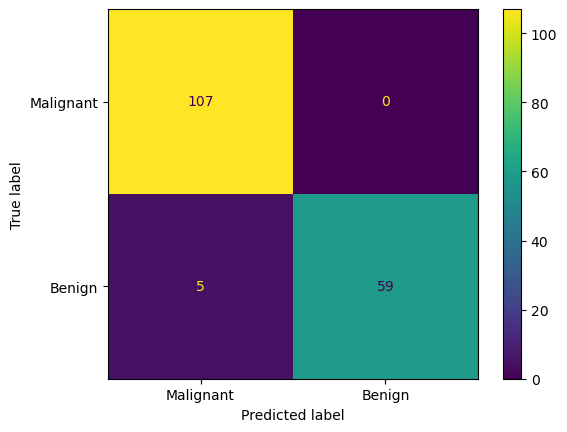

<Figure size 640x480 with 0 Axes>

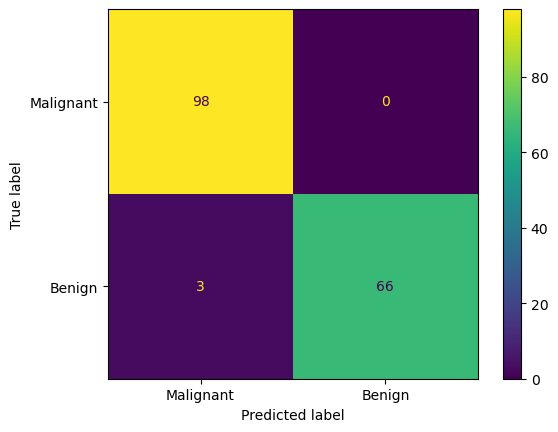

<Figure size 640x480 with 0 Axes>

In [56]:
# Graphical presentation of the confusion matrix for the tests
conf_matrix = confusion_matrix(y_test_original, predictions_test_1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Malignant', 'Benign'])
cm_display.plot()
plt.show()
plt.clf()

conf_matrix = confusion_matrix(y_test_filtered, predictions_test_2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = ['Malignant', 'Benign'])
cm_display.plot()
plt.show()
plt.clf()

## Conclusion

In cases where the patient’s breasts show no concavities (2.3% of the women in the dataset), the Perceptron model 'p1' should be used, as it was trained with datasets containing zero values for concavities.  
Otherwise, if concavities are observed (97.7% of the women in the dataset), model 'p2' should be used, given its superior accuracy in this scenario – zero false negatives and only three false positives.